# Grammar Learner -- batch cruncher 0.1 | 2018-03-31
1st test of Grammar Learner part of ULL pipeline in auto batch mode  

Input data -- [http://88.99.210.144/data/clustering_2018/data/](http://88.99.210.144/data/clustering_2018/data/)  
Output data:
- [http://88.99.210.144/data/clustering_2018/POC-English-2018-03-31/](http://88.99.210.144/data/clustering_2018/POC-English-2018-03-31/)  
- [http://88.99.210.144/data/clustering_2018/POC-Turtle-2018-03-31/](http://88.99.210.144/data/clustering_2018/POC-Turtle-2018-03-31/)  

A static html copy of this notebook is shared via [http://88.99.210.144/data/clustering_2018/html/Grammar-Learner-2018-03-31.html](http://88.99.210.144/data/clustering_2018/html/Grammar-Learner-2018-03-31.html)

This is a continuation of proof-of-concept (POC) experiments in unsupervised language learning (ULL), the OpenCog project hosted on GitHub. The previous results for the simple artificial ["Turtle language" corpus](http://88.99.210.144/data/clustering_2018/data/POC_Turtle/poc-turtle-corpus.txt) are shared as [static html pages](http://88.99.210.144/data/clustering_2018/html/):
- [POC-Turtle-4-Grammar-Learning](http://88.99.210.144/data/clustering_2018/html/POC-Turtle-4-Grammar-Learning.html)  
- [POC-Turtle-5-Lexical-Entries](http://88.99.210.144/data/clustering_2018/html/POC-Turtle-5-Lexical-Entries.html)
- [POC-Turtle-6-Tests](http://88.99.210.144/data/clustering_2018/html/POC-Turtle-6-Tests.html)  

This phase is tested on a simplified ["POC-English-NoAmb"](http://88.99.210.144/data/clustering_2018/data/POC_English_NoAmb/poc_english_noamb_corpus.txt) corpus -- a minimal controlled corpus without word ambiquities ("NoAmb").

In [1]:
import os, sys, time
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import display
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path: sys.path.append(module_path)
from src.utl.utl import UTC
from src.utl.read_files import check_dir
print(UTC())
prefix = '' # option: every project output file will start with thid prefix (legacy, unused)
tmpath = module_path + '/tmp/'
check_dir(tmpath, True, 'none')
from src.grammar_learner.poc import learn_grammar   # Grammar Learner

2018-03-31 20:11:35 UTC


Grammar Learner specification in [Unsupervised Language Learning (ULL) Design (DRAFT)](https://docs.google.com/document/d/14MpKLH5_5eVI39PRZuWLZHa1aUS73pJZNZzgigCWwWg/edit#bookmark=id.rtsrh3l8jgj3):
- Input
  - Directory to read parse files (1 to many input files)
  - Path to store learned categories
  - Path to store learned dictionary Link Grammar file
- Settings
  - Parse_mode, as one of the following
    - given - use all links as given (default)
    - exploded - explode all possible combinations of links given the sentence
  - learn_mode, as one of the following 
    - lexical_entries (default)
    - connectors_only
    - connectors_and_disjuncts (will have to see if it is possible - TODO)
  - TODO - else?
- Output
  - File with learned categories
  - File with learned grammar

**Settings, parameters, data**

In [2]:
# Directory to read parse files (1 to many input files)
input_dir = module_path + '/data/poc_english_noamb_parse_ideal/'

# Paths to store learned categories, learned dictionary Link Grammar file
batch_dir = module_path + '/output/POC-English-2018-03-31/'
prj_dir = batch_dir + 'poc_english_noamb_parse_ideal_Lex_Entries/'  # project directory 
if check_dir(prj_dir, create=True, verbose='min'):
    cat_path = prj_dir  # Path to store learned categories
    dict_path = prj_dir # Path to store learned dictionary Link Grammar file

# Settings:
parse_mode = 'given'            # 'given' (default), 'explosive' (ToDo?)
learn_mode = 'lexical_entries'  # 'lexical_entries' (default) -- part 2
                                # 'connectors_only' -- part 3
                                # 'connectors_and_disjuncts' -- TODO...
verbose='max'   # display intermediate results: 'none', 'min', 'mid', 'max'

# Learning grammar rules based on Lexical Entries 

In [3]:
learn_mode = 'lexical_entries'   # 'lexical_entries' (default) -- part 2, 
vector_space = 'disjuncts'       # 'disjuncts', 'connectors', 'words'
clustering = 'identical_entries' # 'identical_entries', 'kmeans'
grammar_rules = 'disjuncts'      # 'disjuncts', 'connectors'

# Paths to store learned categories, learned dictionary Link Grammar file
prj_dir = batch_dir + 'poc_english_noamb_parse_ideal_Lex_Entries/'  # project directory 
if check_dir(prj_dir, True, 'max'):
    cat_path = prj_dir  # Path to store learned categories
    dict_path = prj_dir # Path to store learned dictionary Link Grammar file

output = learn_grammar(input_dir, cat_path, dict_path, \
                       verbose, parse_mode, learn_mode)  # short default call

Directory /home/oleg/language-learning/output/POC-English-2018-03-31/poc_english_noamb_parse_ideal_Lex_Entries/ exists.
Directory /home/oleg/language-learning/data/poc_english_noamb_parse_ideal/ exists.
Directory /home/oleg/language-learning/data/poc_english_noamb_parse_ideal/ exists.
poc_english_noamb_parse_ideal.txt
['/home/oleg/language-learning/data/poc_english_noamb_parse_ideal/poc_english_noamb_parse_ideal.txt']
Input file: /home/oleg/language-learning/data/poc_english_noamb_parse_ideal/poc_english_noamb_parse_ideal.txt
File #0 /home/oleg/language-learning/data/poc_english_noamb_parse_ideal/poc_english_noamb_parse_ideal.txt checked
File # 0: /home/oleg/language-learning/data/poc_english_noamb_parse_ideal/poc_english_noamb_parse_ideal.txt
70 unique disjuncts form 97 unique word-disjunct pairs from 97 parsed items


Parent,Category,Quality,Words,Relevance
C00,C01,1.0,['.'],[1.0]
C00,C02,1.0,['LEFT-WALL'],[1.0]
C00,C03,1.0,['a'],[1.0]
C00,C04,1.0,['before'],[1.0]
C00,C05,1.0,['cake'],[1.0]
C00,C06,1.0,"['child', 'human']","[1.0, 1.0]"
C00,C07,1.0,"['dad', 'mom']","[1.0, 1.0]"
C00,C08,1.0,"['daughter', 'son']","[1.0, 1.0]"
C00,C09,1.0,['food'],[1.0]
C00,C10,1.0,['is'],[1.0]


C00	C01	1.0	.	1.0
C00	C02	1.0	LEFT-WALL	1.0
C00	C03	1.0	a	1.0
<...>
Total 17 lines, saved to /home/oleg/language-learning/output/POC-English-2018-03-31/poc_english_noamb_parse_ideal_Lex_Entries/categories.txt


Cluster,Germs,L,R,Disjuncts
C01,['.'],[],[],"['C04C01-', 'C05C01-', 'C06C01-', 'C09C01-', 'C14C01-', 'C15C01-', 'C16C01-']"
C02,['LEFT-WALL'],[],[],"['C02C03+', 'C02C05+', 'C02C07+', 'C02C07+ & C02C10+', 'C02C08+', 'C02C10+ & C02C07+', 'C02C16+']"
C03,['a'],[],[],"['C02C03- & C03C07+', 'C02C03- & C03C08+', 'C10C03- & C03C06+', 'C10C03- & C03C15+', 'C13C03-', 'C17C03-']"
C04,['before'],[],[],"['C08C04- & C17C04- & C04C01+', 'C09C04- & C04C01+', 'C11C04- & C04C01+', 'C15C04- & C04C01+']"
C05,['cake'],[],[],"['C02C05- & C05C10+', 'C02C05- & C05C17+', 'C11C05-', 'C12C05- & C05C01+', 'C12C05- & C05C14+']"
C06,"['child', 'human']",[],[],"['C03C06- & C06C01+', 'C03C06- & C06C14+']"
C07,"['dad', 'mom']",[],[],"['C02C07-', 'C02C07- & C07C11+', 'C02C07- & C07C12+', 'C02C07- & C07C17+', 'C03C07- & C07C10+', 'C03C07- & C07C12+']"
C08,"['daughter', 'son']",[],[],"['C02C08- & C08C10+', 'C02C08- & C08C12+', 'C03C08- & C08C10+', 'C03C08- & C08C12+', 'C08C04+']"
C09,['food'],[],[],"['C10C09- & C09C01+', 'C10C09- & C09C14+', 'C17C09- & C09C04+']"
C10,['is'],[],[],"['C02C10- & C10C03+', 'C05C10- & C10C09+', 'C07C10- & C10C03+', 'C08C10- & C10C03+', 'C16C10- & C10C09+']"


% POC Turtle Link Grammar v.0.7 2018-03-31 20:11:36 UTC
<dictionary-version-number>: V0v0v7+;
<dictionary-locale>: EN4us+;

% C01
".":
(C04C01-) or (C05C01-) or (C06C01-) or (C09C01-) or (C14C01-) or (C15C01-) or (C16C01-);

% C02
"LEFT-WALL":
(C02C03+) or (C02C05+) or (C02C07+) or (C02C07+ & C02C10+) or (C02C08+) or (C02C10+ & C02C07+) or (C02C16+);

% C03
"a":
(C02C03- & C03C07+) or (C02C03- & C03C08+) or (C10C03- & C03C06+) or (C10C03- & C03C15+) or (C13C03-) or (C17C03-);

% C04
"before":
(C08C04- & C17C04- & C04C01+) or (C09C04- & C04C01+) or (C11C04- & C04C01+) or (C15C04- & C04C01+);

% C05
"cake":
(C02C05- & C05C10+) or (C02C05- & C05C17+) or (C11C05-) or (C12C05- & C05C01+) or (C12C05- & C05C14+);

% C06
"child" "human":
(C03C06- & C06C01+) or (C03C06- & C06C14+);

% C07
"dad" "mom":
(C02C07-) or (C02C07- & C07C11+) or (C02C07- & C07C12+) or (C02C07- & C07C17+) or (C03C07- & C07C10+) or (C03C07- & C07C12+);

% C08
"daughter" "son":
(C02C08- & C08C10+) or (C02C08- & C08C12+) or

In [4]:
print('Word Categories saved to file:', output['categories_file'][output['categories_file'].find('/POC'):], \
      '\nGrammar rules saved to file:', output['grammar_file'][output['grammar_file'].find('/POC'):])

Word Categories saved to file: /POC-English-2018-03-31/poc_english_noamb_parse_ideal_Lex_Entries/categories.txt 
Grammar rules saved to file: /POC-English-2018-03-31/poc_english_noamb_parse_ideal_Lex_Entries/poc-turtle_17C_2018-03-31_0007.4.0.dict


# Learning grammar clustering words

Directory /home/oleg/language-learning/output/POC-English-2018-03-31/poc_english_noamb_parse_ideal_Connectors/ exists.
Singular values (16): 8.3, 7.4, 6.5, 5.7, 5.4, 5.2, 4.8, 4.4, 3.9, 3.4, 3.3, 3.0, 2.5, 2.5, 2.3, 1.3


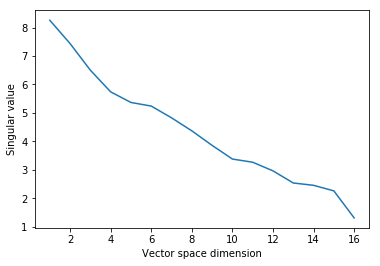

Vector space dimensionality = 16
Singular value (16) = 1.3
Max singular value (1) = 8.3
All singular values within relevance interval - more than 0.1 of max singular value
Silhouette index in a range of cluster numbers


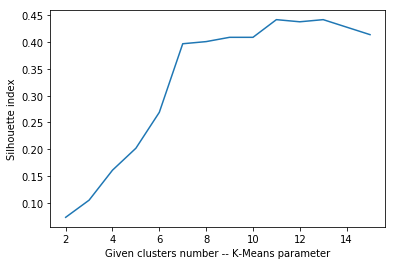

N,NR,Silhouette,Inertia,Cluster words
2,2,0.073,15.791,. LEFT-WALL a is liked likes not was || before cake child dad daughter food human mom now parent sausage son
3,3,0.105,14.043,. before is liked likes now was || LEFT-WALL cake child food human parent sausage || a dad daughter mom not son
4,4,0.161,12.184,. is liked likes now was || dad daughter mom son || LEFT-WALL before cake sausage || a child food human not parent
5,5,0.202,10.67,. LEFT-WALL is likes now was || a food liked not || dad daughter mom son || before cake sausage || child human parent
6,6,0.269,8.867,is liked likes was || dad daughter mom son || child food human parent || cake sausage || . before now || LEFT-WALL a not
7,7,0.397,7.435,LEFT-WALL is liked likes was || daughter son || dad mom || cake sausage || . before now || child human parent || a food not
8,8,0.401,6.336,is was || LEFT-WALL liked likes || daughter son || dad mom || cake sausage || . before now || child human parent || a food not
9,9,0.409,5.28,liked likes || is was || daughter son || dad mom || cake sausage || . before now || child human parent || food not || LEFT-WALL a
10,10,0.409,4.376,liked likes || is was || daughter son || before || dad mom || cake sausage || child human parent || . now || food not || LEFT-WALL a
11,11,0.442,3.447,liked likes || is was || daughter son || food parent || before || dad mom || cake sausage || . now || child human || LEFT-WALL a || not


Threshold at 0.9 max = 0.398
Optimal number of clusters: 8
Cluster words in vector space, axes 1 and 2
Cluster similarities: absolute values > 0.1:
C00	C01	0.0	is was	0 0
C00	C02	0.0	LEFT-WALL liked likes	0 0 0
C00	C03	0.0	daughter son	0 0
C00	C04	0.0	dad mom	0 0
C00	C05	0.0	cake sausage	0 0
C00	C06	0.0	. before now	0 0 0
C00	C07	0.0	child human parent	0 0 0
C00	C08	0.0	a food not	0 0 0
<...>
Total 8 lines, saved to /home/oleg/language-learning/output/POC-English-2018-03-31/poc_english_noamb_parse_ideal_Connectors/categories.txt


Cluster,Germs,L,R,Disjuncts
C01,"['is', 'was']",[],[],"['{C01C02- or C01C03- or C01C03- or C01C05- or C01C04- or C01C04- or C01C05-} & {C01C08+ or C01C08+}', '{C01C04- or C01C04- or C01C05- or C01C05-} & {C01C08+ or C01C06+ or C01C08+ or C01C08+}']"
C02,"['LEFT-WALL', 'liked', 'likes']",[],[],"['C02C08+ or C02C04+ or C02C04+ or C02C01+ or C02C05+ or C02C03+ or C02C05+ or C02C03+', '{C02C04- or C02C04-} & {C02C06+ or C02C05+ or C02C05+}', '{C02C04- or C02C03- or C02C04- or C02C03-} & {C02C05+ or C02C05+}']"
C03,"['daughter', 'son']",[],[],"['{C03C02- or C03C08-} & {C03C01+ or C03C02+ or C03C06+}', '{C03C02- or C03C08-} & {C03C01+ or C03C02+ or C03C06+}']"
C04,"['dad', 'mom']",[],[],"['{C04C02- or C04C08-} & {C04C01+ or C04C02+ or C04C01+ or C04C02+}', '{C04C02- or C04C08-} & {C04C01+ or C04C02+ or C04C01+ or C04C02+}']"
C05,"['cake', 'sausage']",[],[],"['{C05C02- or C05C02- or C05C02-} & {C05C06+ or C05C01+ or C05C06+ or C05C01+}', '{C05C02- or C05C02- or C05C02-} & {C05C06+ or C05C01+ or C05C06+ or C05C01+}']"
C06,"['.', 'before', 'now']",[],[],"['C06C06- or C06C06- or C06C07- or C06C05- or C06C07- or C06C08- or C06C07- or C06C05-', '{C06C08- or C06C02- or C06C07- or C06C01- or C06C03- or C06C03-} & {C06C06+}', '{C06C07- or C06C05- or C06C07- or C06C08- or C06C07- or C06C05-} & {C06C06+}']"
C07,"['child', 'human', 'parent']",[],[],"['{C07C08-} & {C07C06+ or C07C06+}', '{C07C08-} & {C07C06+ or C07C06+}', '{C07C08- or C07C08-} & {C07C06+ or C07C06+ or C07C06+}']"
C08,"['a', 'food', 'not']",[],[],"['{C08C01- or C08C02- or C08C08- or C08C01-} & {C08C07+ or C08C07+ or C08C07+ or C08C04+ or C08C03+ or C08C04+ or C08C03+}', '{C08C01- or C08C01-} & {C08C06+ or C08C06+ or C08C06+}', '{C08C01-} & {C08C08+ or C08C07+}']"


Cluster,Germs,L,R,Disjuncts
C01,"['is', 'was']",[],[],"['{C01C02- or C01C03- or C01C03- or C01C05- or C01C04- or C01C04- or C01C05-} & {C01C08+ or C01C08+}', '{C01C04- or C01C04- or C01C05- or C01C05-} & {C01C08+ or C01C06+ or C01C08+ or C01C08+}']"
C02,"['LEFT-WALL', 'liked', 'likes']",[],[],"['C02C08+ or C02C04+ or C02C04+ or C02C01+ or C02C05+ or C02C03+ or C02C05+ or C02C03+', '{C02C04- or C02C04-} & {C02C06+ or C02C05+ or C02C05+}', '{C02C04- or C02C03- or C02C04- or C02C03-} & {C02C05+ or C02C05+}']"
C03,"['daughter', 'son']",[],[],"['{C03C02- or C03C08-} & {C03C01+ or C03C02+ or C03C06+}', '{C03C02- or C03C08-} & {C03C01+ or C03C02+ or C03C06+}']"
C04,"['dad', 'mom']",[],[],"['{C04C02- or C04C08-} & {C04C01+ or C04C02+ or C04C01+ or C04C02+}', '{C04C02- or C04C08-} & {C04C01+ or C04C02+ or C04C01+ or C04C02+}']"
C05,"['cake', 'sausage']",[],[],"['{C05C02- or C05C02- or C05C02-} & {C05C06+ or C05C01+ or C05C06+ or C05C01+}', '{C05C02- or C05C02- or C05C02-} & {C05C06+ or C05C01+ or C05C06+ or C05C01+}']"
C06,"['.', 'before', 'now']",[],[],"['C06C06- or C06C06- or C06C07- or C06C05- or C06C07- or C06C08- or C06C07- or C06C05-', '{C06C08- or C06C02- or C06C07- or C06C01- or C06C03- or C06C03-} & {C06C06+}', '{C06C07- or C06C05- or C06C07- or C06C08- or C06C07- or C06C05-} & {C06C06+}']"
C07,"['child', 'human', 'parent']",[],[],"['{C07C08-} & {C07C06+ or C07C06+}', '{C07C08-} & {C07C06+ or C07C06+}', '{C07C08- or C07C08-} & {C07C06+ or C07C06+ or C07C06+}']"
C08,"['a', 'food', 'not']",[],[],"['{C08C01- or C08C02- or C08C08- or C08C01-} & {C08C07+ or C08C07+ or C08C07+ or C08C04+ or C08C03+ or C08C04+ or C08C03+}', '{C08C01- or C08C01-} & {C08C06+ or C08C06+ or C08C06+}', '{C08C01-} & {C08C08+ or C08C07+}']"


% POC English Link Grammar v.0.7 2018-03-31 20:11:37 UTC
<dictionary-version-number>: V0v0v7+;
<dictionary-locale>: EN4us+;

% C01
"is" "was":
({C01C02- or C01C03- or C01C03- or C01C05- or C01C04- or C01C04- or C01C05-} & {C01C08+ or C01C08+}) or ({C01C04- or C01C04- or C01C05- or C01C05-} & {C01C08+ or C01C06+ or C01C08+ or C01C08+});

% C02
"LEFT-WALL" "liked" "likes":
(C02C08+ or C02C04+ or C02C04+ or C02C01+ or C02C05+ or C02C03+ or C02C05+ or C02C03+) or ({C02C04- or C02C04-} & {C02C06+ or C02C05+ or C02C05+}) or ({C02C04- or C02C03- or C02C04- or C02C03-} & {C02C05+ or C02C05+});

% C03
"daughter" "son":
({C03C02- or C03C08-} & {C03C01+ or C03C02+ or C03C06+}) or ({C03C02- or C03C08-} & {C03C01+ or C03C02+ or C03C06+});

% C04
"dad" "mom":
({C04C02- or C04C08-} & {C04C01+ or C04C02+ or C04C01+ or C04C02+}) or ({C04C02- or C04C08-} & {C04C01+ or C04C02+ or C04C01+ or C04C02+});

% C05
"cake" "sausage":
({C05C02- or C05C02- or C05C02-} & {C05C06+ or C05C01+ or C05C06+ or C05C01+}) 

{'categories_file': '/home/oleg/language-learning/output/POC-English-2018-03-31/poc_english_noamb_parse_ideal_Connectors/categories.txt',
 'grammar_file': '/home/oleg/language-learning/output/POC-English-2018-03-31/poc_english_noamb_parse_ideal_Connectors/poc-turtle_8C_2018-03-31_0007.4.0.dict'}

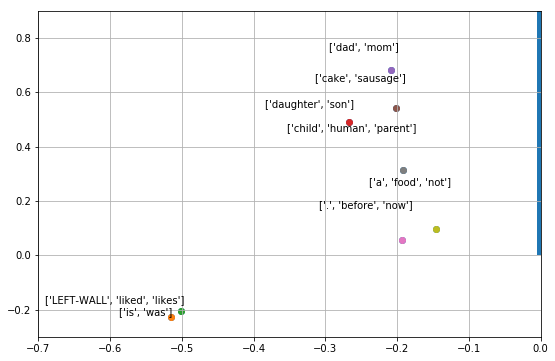

In [5]:
learn_mode = 'connectors_only'
vector_space = 'connectors'     # ALT: 'disjuncts' (part 2), 'words' (ToDo?)
clustering = 'kmeans'           # ALT: 'lexical_entries' (part 2)
grammar_rules = 'connectors'    # ALT: 'disjuncts' (part 2)

# Paths to store learned categories, learned dictionary Link Grammar file
prj_dir = batch_dir + 'poc_english_noamb_parse_ideal_Connectors/'  # project directory 
if check_dir(prj_dir, True, 'max'):
    cat_path = prj_dir  # Path to store learned categories
    dict_path = prj_dir  # Path to store learned dictionary Link Grammar file

word_space = 'hyperwords'   # ALT: 'discrete' - no dimensionality reduction
dim_max = 100               # max dimensionality
sv_min = 0.1                # minimal singular value (fraction of the max value)

clustering = 'kmeans'
cluster_range = (2,48,1)    # mim, max, step
cluster_criteria = 'silhouette'
cluster_level = 0.9         # level = 0, 1, 0.-0.99..

learn_grammar(input_dir, cat_path, dict_path, verbose, 
    parse_mode, learn_mode, word_space, dim_max, sv_min, 
    clustering, cluster_range, cluster_criteria, cluster_level, tmpath)

In [6]:
print('Word Categories saved to file:', output['categories_file'][output['categories_file'].find('/POC'):], \
      '\nGrammar rules saved to file:', output['grammar_file'][output['grammar_file'].find('/POC'):])

Word Categories saved to file: /POC-English-2018-03-31/poc_english_noamb_parse_ideal_Lex_Entries/categories.txt 
Grammar rules saved to file: /POC-English-2018-03-31/poc_english_noamb_parse_ideal_Lex_Entries/poc-turtle_17C_2018-03-31_0007.4.0.dict


# Batch mode: POC-English corpus, no ambiquities, various parses

## Learning grammar rules based on Lexical Entries 

In [7]:
learn_mode = 'lexical_entries'
verbose = 'mid'
input_batch = module_path + '/data/POC_English_NoAmb/'
dirs = sorted([x[0] for x in os.walk(input_batch)][1:])
for d in dirs:
    print('---')
    prj_dir = batch_dir + d[d.rfind('/')+1:] + '_Lex_Entries/'
    if check_dir(prj_dir, True, 'max'):
        cat_path = prj_dir  # Path to store learned categories
        dict_path = prj_dir  # Path to store learned dictionary Link Grammar file
        output = learn_grammar(d, cat_path, dict_path, verbose, parse_mode, learn_mode)
        print('Word Categories saved to file:', output['categories_file'][output['categories_file'].find('/POC'):], \
              '\nGrammar rules saved to file:', output['grammar_file'][output['grammar_file'].find('/POC'):])

---
Directory /home/oleg/language-learning/output/POC-English-2018-03-31/poc-english_noAmb-parses-window6_Lex_Entries/ exists.
Input file: /home/oleg/language-learning/data/POC_English_NoAmb/poc-english_noAmb-parses-window6/poc-english_noAmb-parses-window6.txt
85 unique disjuncts form 113 unique word-disjunct pairs from 113 parsed items
Word Categories saved to file: /POC-English-2018-03-31/poc-english_noAmb-parses-window6_Lex_Entries/categories.txt 
Grammar rules saved to file: /POC-English-2018-03-31/poc-english_noAmb-parses-window6_Lex_Entries/poc-turtle_20C_2018-03-31_0007.4.0.dict
---
Directory /home/oleg/language-learning/output/POC-English-2018-03-31/poc-english_noAmb-parses-window6-distance_Lex_Entries/ exists.
Input file: /home/oleg/language-learning/data/POC_English_NoAmb/poc-english_noAmb-parses-window6-distance/poc-english_noAmb-parses-window6-distance.txt
64 unique disjuncts form 97 unique word-disjunct pairs from 97 parsed items
Word Categories saved to file: /POC-English

## Learning grammar clustering words in connectors space

In [8]:
learn_mode = 'connectors_only'
verbose = 'min'
for d in dirs:
    print('---') # print(d)
    prj_dir = batch_dir + d[d.rfind('/')+1:] + '_Connectors/'
    if check_dir(prj_dir, True, 'max'):
        cat_path = prj_dir  # Path to store learned categories
        dict_path = prj_dir # Path to store learned dictionary Link Grammar file
        output = learn_grammar(d, cat_path, dict_path, verbose, 
            parse_mode, learn_mode, word_space, dim_max, sv_min, 
            clustering, cluster_range, cluster_criteria, cluster_level, tmpath)        
        print('Word Categories saved to file:', output['categories_file'][output['categories_file'].find('/POC'):], \
              '\nGrammar rules saved to file:', output['grammar_file'][output['grammar_file'].find('/POC'):])

---
Directory /home/oleg/language-learning/output/POC-English-2018-03-31/poc-english_noAmb-parses-window6_Connectors/ exists.
Optimal vector space dimensionality: 19
Optimal number of clusters: 9
Word Categories saved to file: /POC-English-2018-03-31/poc-english_noAmb-parses-window6_Connectors/categories.txt 
Grammar rules saved to file: /POC-English-2018-03-31/poc-english_noAmb-parses-window6_Connectors/poc-turtle_9C_2018-03-31_0007.4.0.dict
---
Directory /home/oleg/language-learning/output/POC-English-2018-03-31/poc-english_noAmb-parses-window6-distance_Connectors/ exists.
Optimal vector space dimensionality: 15
Optimal number of clusters: 7
Word Categories saved to file: /POC-English-2018-03-31/poc-english_noAmb-parses-window6-distance_Connectors/categories.txt 
Grammar rules saved to file: /POC-English-2018-03-31/poc-english_noAmb-parses-window6-distance_Connectors/poc-turtle_7C_2018-03-31_0007.4.0.dict
---
Directory /home/oleg/language-learning/output/POC-English-2018-03-31/poc_en

# POC-Turtle corpus: 2 parsing samples tested in batch mode

In [9]:
batch_dir = module_path + '/output/POC-Turtle-2018-03-31/'
verbose = 'none'
input_batch = module_path + '/data/POC_Turtle/'
dirs = sorted([x[0] for x in os.walk(input_batch)][1:])
learn_mode = 'lexical_entries'
for d in dirs:
    prj_dir = batch_dir + d[d.rfind('/')+1:] + '_Lex_Entries/'
    if check_dir(prj_dir, True, 'min'):
        cat_path = prj_dir
        dict_path = prj_dir
        output = learn_grammar(d, cat_path, dict_path, verbose, parse_mode, 'lexical_entries')
        print('Word Categories saved to file:', output['categories_file'][output['categories_file'].find('/POC'):], \
              '\nGrammar rules saved to file:', output['grammar_file'][output['grammar_file'].find('/POC'):])
    print('---')
    prj_dir = batch_dir + d[d.rfind('/')+1:] + '_Connectors/'
    if check_dir(prj_dir, True, 'min'):
        cat_path = prj_dir
        dict_path = prj_dir
        output = learn_grammar(d, cat_path, dict_path, verbose, 
            parse_mode, 'connectors_only', word_space, dim_max, sv_min, 
            clustering, cluster_range, cluster_criteria, cluster_level, tmpath)        
        print('Word Categories saved to file:', output['categories_file'][output['categories_file'].find('/POC'):], \
              '\nGrammar rules saved to file:', output['grammar_file'][output['grammar_file'].find('/POC'):])
        print('===')

Word Categories saved to file: /POC-Turtle-2018-03-31/poc-turtle-parses-expected_Lex_Entries/categories.txt 
Grammar rules saved to file: /POC-Turtle-2018-03-31/poc-turtle-parses-expected_Lex_Entries/poc-turtle_9C_2018-03-31_0007.4.0.dict
---
Optimal number of clusters: 4
Word Categories saved to file: /POC-Turtle-2018-03-31/poc-turtle-parses-expected_Connectors/categories.txt 
Grammar rules saved to file: /POC-Turtle-2018-03-31/poc-turtle-parses-expected_Connectors/poc-turtle_4C_2018-03-31_0007.4.0.dict
===
Word Categories saved to file: /POC-Turtle-2018-03-31/poc-turtle-parses-window6_Lex_Entries/categories.txt 
Grammar rules saved to file: /POC-Turtle-2018-03-31/poc-turtle-parses-window6_Lex_Entries/poc-turtle_12C_2018-03-31_0007.4.0.dict
---
Optimal number of clusters: 7
Word Categories saved to file: /POC-Turtle-2018-03-31/poc-turtle-parses-window6_Connectors/categories.txt 
Grammar rules saved to file: /POC-Turtle-2018-03-31/poc-turtle-parses-window6_Connectors/poc-turtle_7C_2018

`poc-turtle-parses-window6-distance.txt -- error in Grammar Learner 'connector_only' mode :(`